#--
-  https://blog.quantinsti.com/trading-using-machine-learning-python/

In [4]:
#!pip install yfinance

In [5]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from IPython import get_ipython

In [8]:
avg_err={}
avg_train_err={}

# To fetch financial data
import yfinance as yf

# Fetch data
AAPL_data= yf.download('AAPL', start='2005-1-1', end='2023-9-1', auto_adjust = True)
df = AAPL_data[['Open', 'High', 'Low', 'Close']].copy()

[*********************100%%**********************]  1 of 1 completed


In [10]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-01-03,0.981876,0.986878,0.948833,0.959292
2005-01-04,0.966870,0.992334,0.954441,0.969144
2005-01-05,0.977025,0.989000,0.970811,0.977632
2005-01-06,0.980208,0.983846,0.959898,0.978390
2005-01-07,0.985210,1.055387,0.981421,1.049628


In [11]:
df['open']=AAPL_data['Open'].shift(1)
df['high']=AAPL_data['High'].shift(1)
df['low']=AAPL_data['Low'].shift(1)
df['close']=AAPL_data['Close'].shift(1)
df=df.dropna()

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
steps = [('imputation', imp),
('scaler',StandardScaler()),
('lasso',Lasso())]
pipeline =Pipeline(steps)
parameters = {'lasso__alpha':np.arange(0.0001,10,.0001),
'lasso__max_iter':np.random.uniform(100,100000,4)}
reg = rcv(pipeline, parameters,cv=5)
#view rawCreating_hyperparameters.py hosted with ❤ by GitHub

In [15]:
X = df[['open','high','low','close']]
y = df['Close']

In [16]:
avg_err={}

In [18]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [19]:
for t in np.arange(50, 97, 3):
    split = int(t * len(X) / 100)
    reg = GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 0.5, 1.0], 'max_iter': [1000, 2000, 5000]})
    reg.fit(X[:split], y[:split])
    best_alpha = reg.best_params_['alpha']
    best_iter = reg.best_params_['max_iter']
    reg1 = Lasso(alpha=best_alpha, max_iter=best_iter)
    X = imp.fit_transform(X, y)
    reg1.fit(X[:split], y[:split])

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.349e+01, tolerance: 5.416e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+01, tolerance: 6.768e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.243e+00, tolerance: 8.908e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+01, tolerance: 9.581e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.767e+00, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+01, tolerance: 1.432e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+01, tolerance: 1.277e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.406e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.679e+01, tolerance: 1.475e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.156e+01, tolerance: 1.736e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.599e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.237e+01, tolerance: 1.682e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.759e+01, tolerance: 1.989e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.545e+01, tolerance: 2.214e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+01, tolerance: 2.583e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.364e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.289e+01, tolerance: 2.965e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.882e+01, tolerance: 3.411e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.072e+01, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.863e+01, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+02, tolerance: 4.732e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+02, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+02, tolerance: 5.004e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+02, tolerance: 5.644e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+02, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+02, tolerance: 6.462e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+02, tolerance: 7.229e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+02, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+02, tolerance: 1.001e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+02, tolerance: 1.099e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.524e+02, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.395e+02, tolerance: 2.087e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.721e+02, tolerance: 2.222e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.038e+02, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.062e+01, tolerance: 3.367e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+03, tolerance: 3.490e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.209e+03, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.521e+02, tolerance: 4.051e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.141e+01, tolerance: 4.202e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.031e+03, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+03, tolerance: 7.420e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+03, tolerance: 7.716e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+03, toleranc

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+03, tolerance: 7.420e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e+03, tolerance: 7.716e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+03, toleranc

In [20]:
df['P_C_%i'%t]=0.
df.iloc[:,df.columns.get_loc('P_C_%i'%t)]=reg1.predict(X[:])
df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])
e =np.mean(df['Error_%i'%t][split:])
train_e= np.mean(df['Error_%i'%t][:split])
avg_err[t]=e
avg_train_err[t]=train_e

C:\Users\du\AppData\Local\Temp\ipykernel_4440\2356801930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P_C_%i'%t]=0.
C:\Users\du\AppData\Local\Temp\ipykernel_4440\2356801930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])



Average Range of the Day: 3.3077342704220696


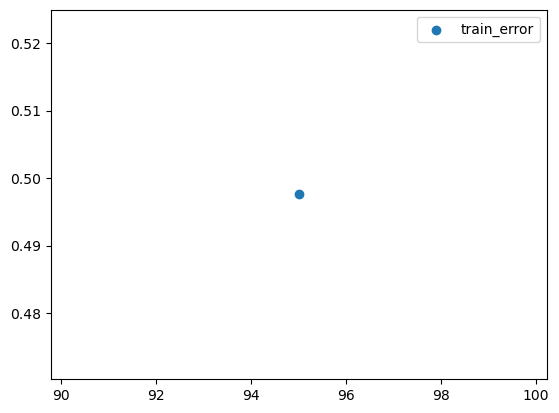

In [21]:
Range =df['high'][split:]-df['low'][split:]
plt.scatter(list(avg_train_err.keys()),list(avg_train_err.values()),label='train_error')
plt.legend(loc='best')
print ('\nAverage Range of the Day:',np.average(Range))